Kevin Armbruster - 930519-T711
xxx

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import maze_q_learning as qmz
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Description of the maze as a numpy array
maze = np.array([
    [0, 0, 1, 0, 0, 0, 0, 3],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 1, 1, 1, 0],
    [0, 0, 0, 0, 1, 2, 0, 0]
])
# with the convention 
# 0 = empty cell
# 1 = obstacle
# 2 = exit of the Maze
# 3 = key to exit of the Maze

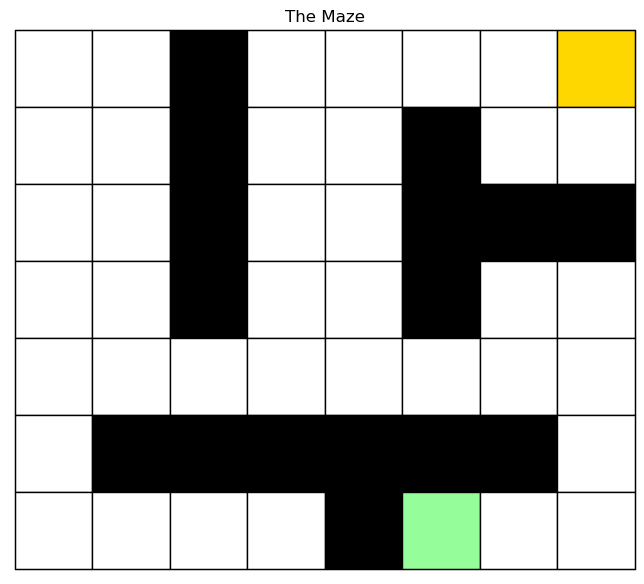

In [4]:
qmz.draw_maze(maze)

In [189]:
env = qmz.QLearningMaze(maze, minotaur_can_stay=False)
# number of initial state
env.map[(0,0,6,5,0)]

53

# Q-learning

In [57]:
expl1 = 0.1
expl2 = 0.05

In [173]:
Q, N, policy_QL, V_initial_state1 = env.q_learning(number_episodes=50000, step_size_exponent=2/3, exploration_prob=expl1)


Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  50000


In [174]:
Q, N, policy_QL, V_initial_state2 = env.q_learning(number_episodes=50000, step_size_exponent=2/3, exploration_prob=expl2)


Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  50000


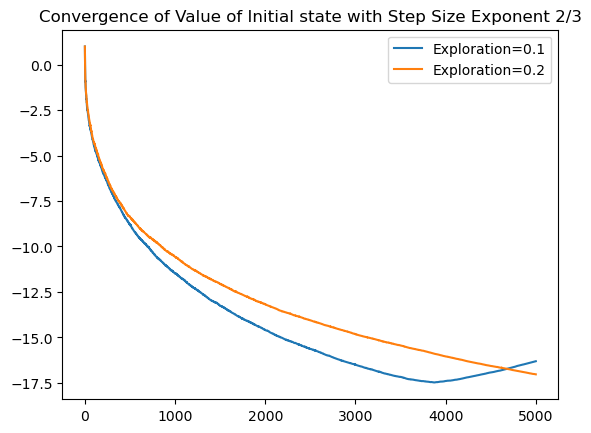

In [175]:
plt.plot(range(len(V_initial_state1[::10])), V_initial_state1[::10], label=f"Exploration={expl1}")
plt.plot(range(len(V_initial_state2[::10])), V_initial_state2[::10], label=f"Exploration={expl2}")
plt.title(f"Convergence of Value of Initial state with Step Size Exponent 2/3")
plt.legend()
plt.show()

In [176]:
expo1 = 0.5
expo2 = 0.7
expl = 0.05

In [177]:
Q, N, policy_QL, V_initial_state3 = env.q_learning(number_episodes=50000, step_size_exponent=expo1, exploration_prob=expl)


Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  50000


In [178]:
Q, N, policy_QL, V_initial_state4 = env.q_learning(number_episodes=50000, step_size_exponent=expo2, exploration_prob=expl)


Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  50000


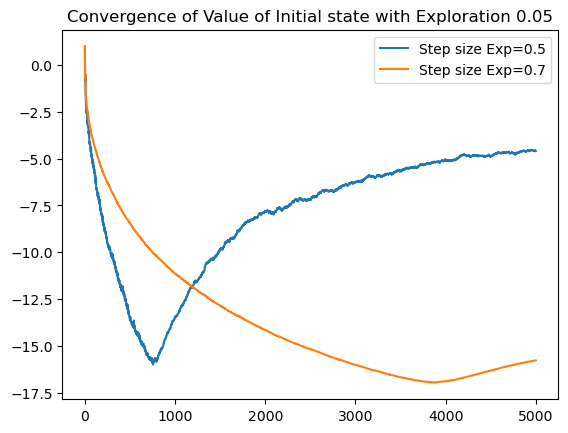

In [179]:
plt.plot(range(len(V_initial_state3[::10])), V_initial_state3[::10], label=f"Step size Exp={expo1}")
plt.plot(range(len(V_initial_state4[::10])), V_initial_state4[::10], label=f"Step size Exp={expo2}")
plt.title(f"Convergence of Value of Initial state with Exploration {expl}")
plt.legend()
plt.show()


In [169]:
Q, N, policy_QLf, _ = env.q_learning(number_episodes=50000, step_size_exponent=0.5, exploration_prob=0.05)


Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  50000


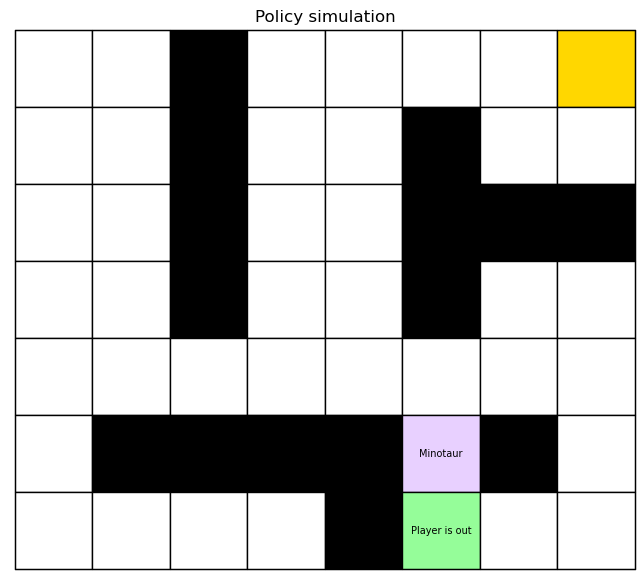

In [180]:
start = (0, 0, 6, 5, 0)
path_QL = env.simulate_path(start, policy_QLf)
qmz.animate_solution(maze, path_QL)

In [202]:
#Probability
Q, N, policy_QLf, _ = env.q_learning(number_episodes=50000, step_size_exponent=0.35, exploration_prob=0.05)
history = []
for i in range(50000):
    path_QL = env.simulate_path(start, policy_QLf, max_steps=50)
    history.append(env.check_player_escaped(env.map[path_QL[-1]]))
prob = sum(history)/len(history)
print("Q-learning escape probability", prob)
Q_init_QL = Q[53,:]
print("Q-value", Q_init_QL) # 53 is initial state 0.94 with 0.4

Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  50000
Q-learning escape probability 0.93936
Q-value [-25.93477555 -25.05604843 -24.13817342 -24.86194745 -23.87452645]


# SARSA

In [130]:
expl1 = 0.1
expl2 = 0.2

Q, N, policy_SARSA1, V_initial_state5 = env.sarsa(number_episodes=100000, exploration_prob=expl1, step_size_exponent=2/3)

Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  50000
Iteration  60000
Iteration  70000
Iteration  80000
Iteration  90000
Iteration  100000


In [131]:
Q, N, policy_SARSA2, V_initial_state6 = env.sarsa(number_episodes=100000, exploration_prob=expl2, step_size_exponent=2/3)

Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  50000
Iteration  60000
Iteration  70000
Iteration  80000
Iteration  90000
Iteration  100000


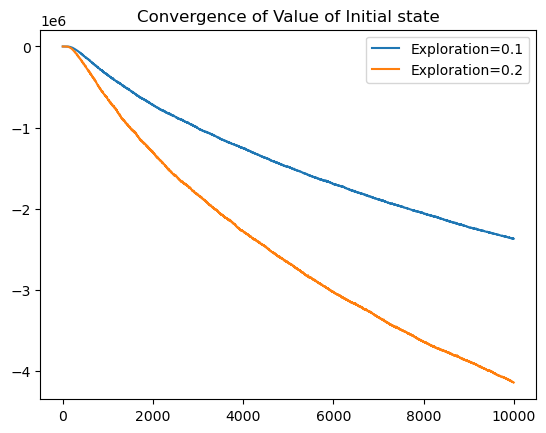

In [132]:
plt.plot(range(len(V_initial_state5[::10])), V_initial_state5[::10], label=f"Exploration={expl1}")
plt.plot(range(len(V_initial_state6[::10])), V_initial_state6[::10], label=f"Exploration={expl2}")
plt.title("Convergence of Value of Initial state")
plt.legend()
plt.show()


In [161]:
expd1=0.5
expd2=0.9

In [162]:
Q, N, policy_SARSA3, V_initial_state7 = env.sarsa(exploration_decay=expd1, step_size_exponent=2/3)


Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  50000


In [163]:
Q, N, policy_SARSA4, V_initial_state8 = env.sarsa(exploration_decay=expd2, step_size_exponent=2/3)


Iteration  10000
Iteration  20000
Iteration  30000
Iteration  40000
Iteration  50000


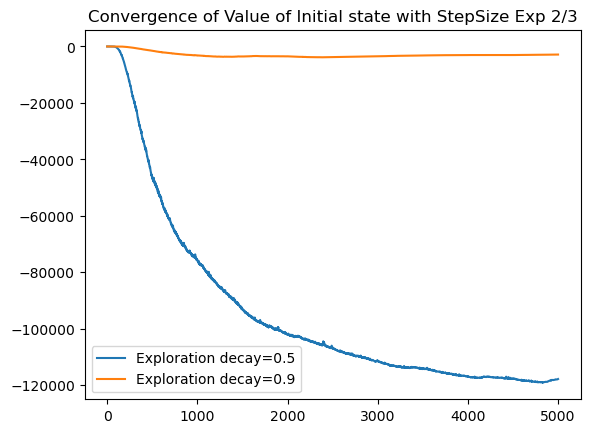

In [164]:
plt.plot(range(len(V_initial_state7[::10])), V_initial_state7[::10], label=f"Exploration decay={expd1}")
plt.plot(range(len(V_initial_state8[::10])), V_initial_state8[::10], label=f"Exploration decay={expd2}")
plt.title("Convergence of Value of Initial state with StepSize Exp 2/3")
plt.legend()
plt.show()


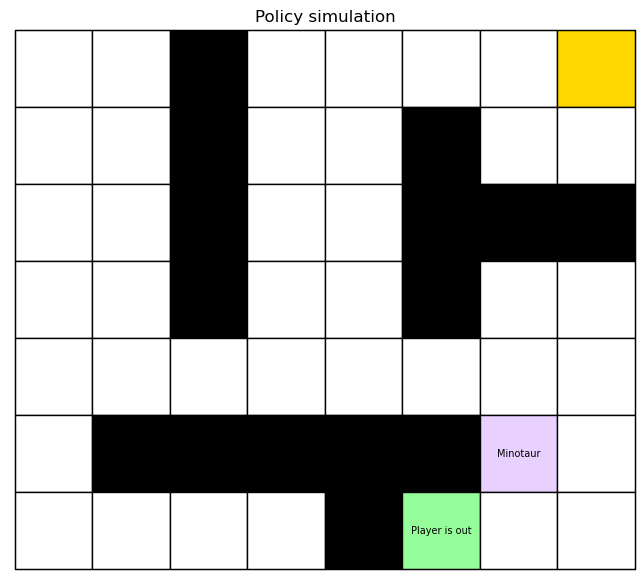

In [166]:
start = (0, 0, 6, 5, 0)
path_SARSA = env.simulate_path(start, policy_SARSA3)
qmz.animate_solution(maze, path_SARSA)

In [ ]:
#Probability
Q, N, policy_SARSAf, _ = env.sarsa(exploration_decay=0.35, step_size_exponent=2/3)
history = []
for i in range(50000):
    path_QL = env.simulate_path(start, policy_SARSAf, max_steps=50)
    history.append(env.check_player_escaped(env.map[path_QL[-1]]))
prob = sum(history)/len(history)
print("SARSA escape probability", prob)
Q_init_SARSA = Q[53,:]
print("Q-value", Q_init_SARSA) # 53 is initial state 0.616 with 0.3

In [194]:
probs_QL = [x/sum(Q_init_QL) for x in Q_init_QL]
probs_SARSA = [x/sum(Q_init_SARSA) for x in Q_init_SARSA]

print(probs_QL)
print(probs_SARSA)

[0.2081833976128629, 0.19898016440708566, 0.1971004565413773, 0.1987807628641804, 0.1969552185744937]
[0.20000456399560554, 0.20000878779815903, 0.20000979334273974, 0.2000058376539387, 0.19997101720955707]
